In [1]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data\pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [27]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [4]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


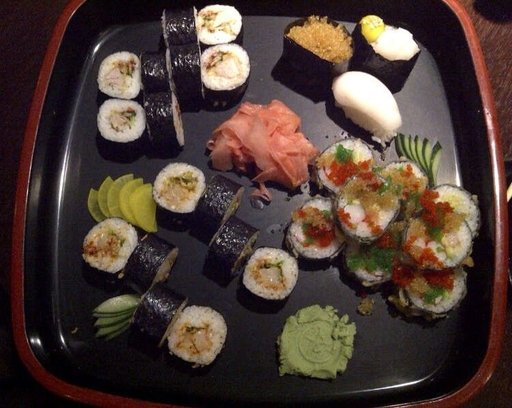

In [6]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

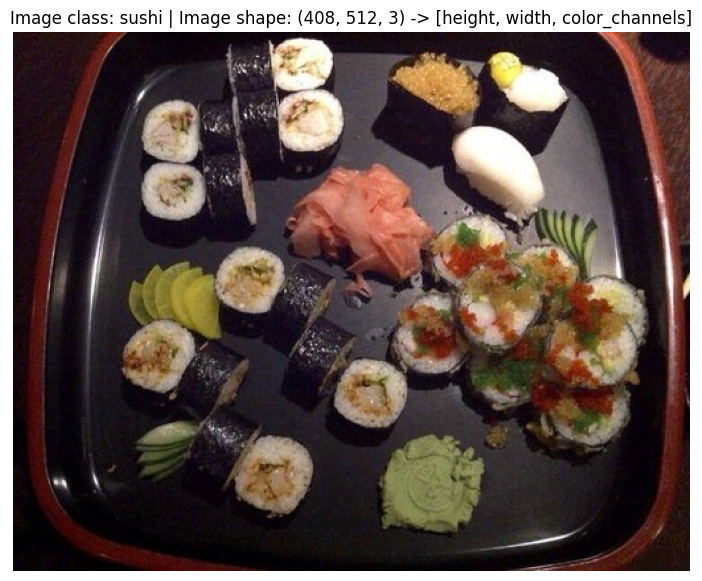

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [9]:
img_as_array

array([[[33, 13, 15],
        [30, 10, 12],
        [30, 10, 12],
        ...,
        [23, 14, 19],
        [21, 12, 17],
        [20, 11, 16]],

       [[35, 15, 17],
        [32, 12, 14],
        [31, 11, 13],
        ...,
        [21, 12, 17],
        [19, 10, 15],
        [19, 10, 15]],

       [[34, 15, 17],
        [31, 12, 14],
        [30, 11, 13],
        ...,
        [19,  9, 17],
        [18,  8, 16],
        [18,  8, 16]],

       ...,

       [[11,  6, 12],
        [11,  6, 12],
        [11,  6, 12],
        ...,
        [33, 19, 18],
        [33, 19, 19],
        [31, 17, 17]],

       [[ 8,  3,  9],
        [ 9,  4, 10],
        [ 9,  4, 10],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [27, 11, 11]],

       [[ 4,  0,  5],
        [ 5,  0,  6],
        [ 6,  1,  7],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [25,  9,  9]]], dtype=uint8)

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [13]:
#Write a transform for image
data_transform = transforms.Compose([
    #Resize our image
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into a torch.Tensor
    transforms.ToTensor(),   
]
)

In [17]:
i = data_transform(img)


tensor([[[0.0824, 0.0824, 0.0863,  ..., 0.1412, 0.1373, 0.1294],
         [0.0902, 0.0902, 0.0902,  ..., 0.1412, 0.1373, 0.1255],
         [0.1137, 0.0980, 0.1059,  ..., 0.1333, 0.1412, 0.1294],
         ...,
         [0.1412, 0.1373, 0.1294,  ..., 0.0157, 0.0196, 0.0157],
         [0.1333, 0.1373, 0.1255,  ..., 0.0275, 0.0275, 0.0275],
         [0.1255, 0.1294, 0.1137,  ..., 0.0275, 0.0314, 0.0314]],

        [[0.0431, 0.0431, 0.0392,  ..., 0.0667, 0.0588, 0.0588],
         [0.0353, 0.0431, 0.0392,  ..., 0.0667, 0.0549, 0.0588],
         [0.0392, 0.0471, 0.0471,  ..., 0.0627, 0.0627, 0.0510],
         ...,
         [0.0667, 0.0667, 0.0667,  ..., 0.0078, 0.0078, 0.0039],
         [0.0667, 0.0706, 0.0706,  ..., 0.0118, 0.0118, 0.0118],
         [0.0667, 0.0667, 0.0667,  ..., 0.0196, 0.0157, 0.0118]],

        [[0.0745, 0.0706, 0.0706,  ..., 0.0667, 0.0667, 0.0667],
         [0.0863, 0.0902, 0.0941,  ..., 0.0863, 0.0784, 0.0784],
         [0.1137, 0.1059, 0.0941,  ..., 0.0941, 0.0863, 0.

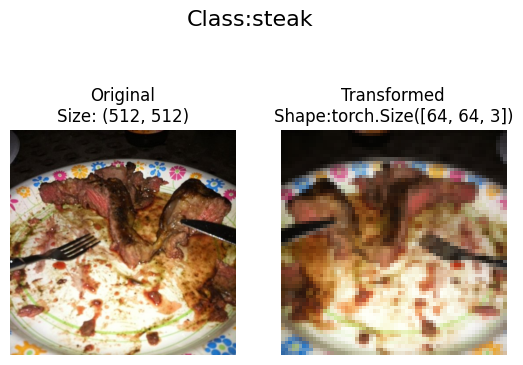

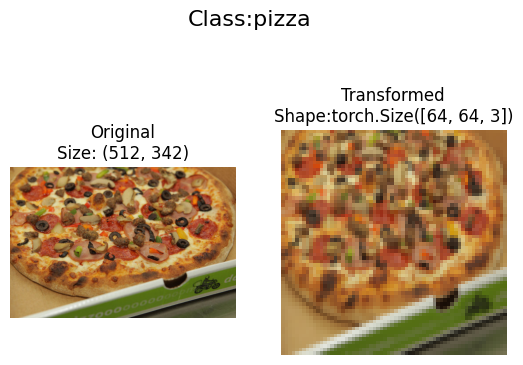

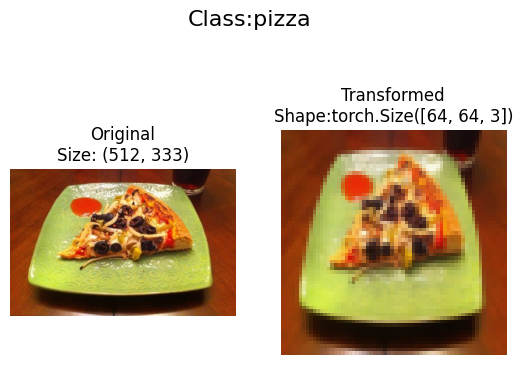

In [25]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            
            #Transform and plot target image
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nShape:{transformed_image.shape}')
            ax[1].axis(False)
            
            fig.suptitle(f'Class:{image_path.parent.stem}', fontsize=16)
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
            
                       )                       
     
            

In [30]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [44]:
class_names = train_data.classes

In [37]:
train_data.samples

[('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1033251.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1044789.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1089334.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1105700.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\12301.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1285298.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\138855.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1412034.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1524655.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1572608.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1633289.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1649276.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1654444.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1660415.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1899785.jpg', 0),
 ('data\\pizza_steak_sushi\\train\\pizza\\1

In [38]:
train_data[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [42]:
img,label = train_data[0][0], train_data[0][1]
print(f'Image tensor:\n {img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {label}')
print(f'Label datatype: {type(label)}')

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height,width]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

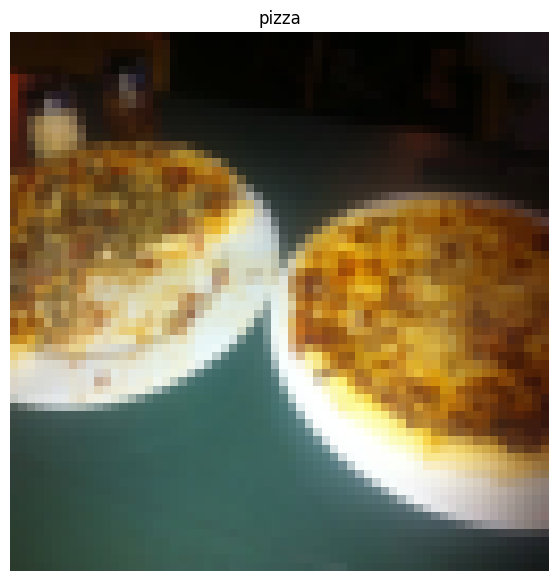

In [45]:
img_permute = img.permute(1,2,0)
print(f"Original shape: {img.shape} -> [color_channels, height,width]")
print(f'Image permute: {img_permute.shape} -> [height, width, color_channels]')
plt.figure(figsize=(10,7))
plt.imshow(img_permuten)
plt.axis('off')
plt.title(class_names[label])

In [46]:
os.cpu_count()

16

In [52]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE, num_workers=os.cpu_count(), shuffle=False)
len(train_dataloader), len(test_dataloader)

(225, 75)

In [54]:
img, label = next(iter(train_dataloader))

print(f'Image shape:{img.shape} -> [batch_size, color_channels, height, width]')
print(f'Label shape: {label.shape}')


Image shape:torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## Option 2: Loading Image Data with a Custom 'Dataset'

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:
    * Can create a 'Dataset' out of almost anything
    * Not limited to PyTorch pre-built `Dataset` functions
    
Cons:
    * Even though you could create `Dataset` out of almost anything, it doesn't mmean it will work...
    * Using a custom `Dataset` often result in us writing more code, which could be prone to errors or performance issues
    
   **All custom datasets in PyTorch, often subclass Datasets

In [56]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List




In [57]:
#Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
    1. Get the class names using os.scandir() to traverse a target directory (ideally the directory is in standard image classification format)
    2. Raise an error if the class names aren't found (if this happens, there might be something wrong with this)
    3. Turn the class names into a dict and a list and return them.
    
    

In [58]:
target_directory = train_dir
target_directory

WindowsPath('data/pizza_steak_sushi/train')

In [61]:
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [63]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [67]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
    classes = sorted([entry.name for entry in list(os.scandir(target_directory))])
    
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}...")
    
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [68]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom 'Dataset' to replicate 'ImageFolder'

To create our own custom dataset, we want to:

    1. Subclass `torch.utils.data.Dataset`
    2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transfrom if 
       we'd like to transform our data.
    3. Create several attributes:
        *paths - path of our images
        *transform - the transform we'd like to use
        *classes - a list of the target class
        *class_to_idx - a dict of the target classes mapped to integer label
    4. Create a function to `load_images()`, this function will open an image
    5. Overwrite the `__len()__` method to return the length of our dataset
    6. Overwrite the `__getitem()__ method to return a given smaple when passed an index

In [99]:
#Write a custom dataset class
from torch.utils.data import Dataset

#1. subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    #2. Initialize our custom dataset
    def __init__(self, targ_dir: str, transform=None):
        #3. Create class attributes
        #get all of the image paths
        self.paths= list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        #Setup transform
        self.transform = transform
        #Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)
    
    #4. Create a function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)
    
    #5. overwrite __len__() method
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    #6. Overwrite__get_item__() method to return a particular sample
    def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X,y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        
        #Transform if neccessary
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [100]:
#Create a transform
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [101]:
train_data_custom = ImageFolderCustom(targ_dir= train_dir,
                                      transform= train_transform,
                                      )
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform= test_transform,
                                      )

len(train_data), len(train_data_custom)

(225, 225)

In [102]:
train_data[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize
2. To prevent the diplay getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target datset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimension of our images line up with matplotlib (HWC)


In [146]:
#1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int=10,
                          display_shape: bool = True,
                          seed: int = None):
    #2. Adjust display if n is too high
    if n > 5:
        display_shape = False
        print('Display_shape is set to False')
        if n > 10:
            n= 10
            print("For display purposes, n shouldn't be higher than 10, setting to 10")

        
    #3. Set the seed
    if seed:
            random.seed(seed)
        

    
    #4. Get random sampels indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)
        
        
        #5. Setup plot
    plt.figure(figsize=(16,8))

        #6 Loop through random indexes and plot them with mtplotlib
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        #7. adjust tensor dimensions for plotting
        targ_image_adjust = targ_image.permute(1,2,0)
            
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        if classes:
            title = f'{classes[targ_label]}'
            if display_shape:
                title = title + f'\nshape: {targ_image_adjust.shape}'
            plt.title(title)
            


Display_shape is set to False
For display purposes, n shouldn't be higher than 10, setting to 10


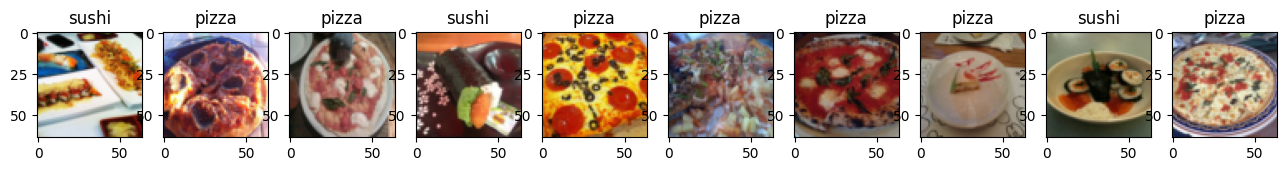

In [147]:
display_random_images(dataset=train_data,
                     n=12,
                     classes=class_names,
                     seed=42)

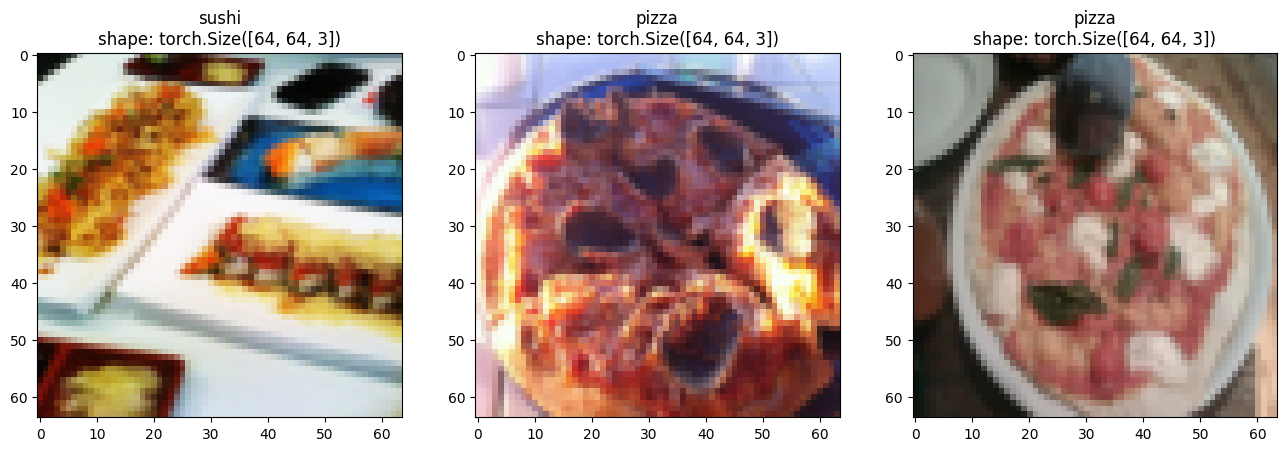

In [148]:
display_random_images(dataset=train_data_custom,
                     n=3,
                     classes=class_names,
                     seed=42)

### 5.4 Turn custom dataset into Dataloader's

In [156]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                    
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                         
                                     shuffle=False)
train_dataloader_custom, test_dataloader_custom




(<torch.utils.data.dataloader.DataLoader at 0x1b18ee11000>,
 <torch.utils.data.dataloader.DataLoader at 0x1b18f6b4af0>)

In [157]:
#Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape


(torch.Size([32, 3, 64, 64]), torch.Size([32]))

##  6. Other forms of transform (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this may mean applying various image transformations to the training images.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels...

This practice hopefully results in a model that's more generalisable to unseen data



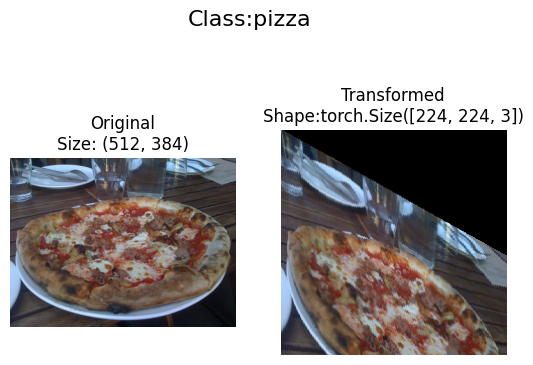

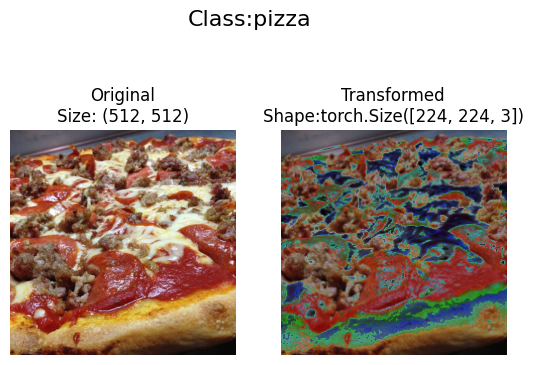

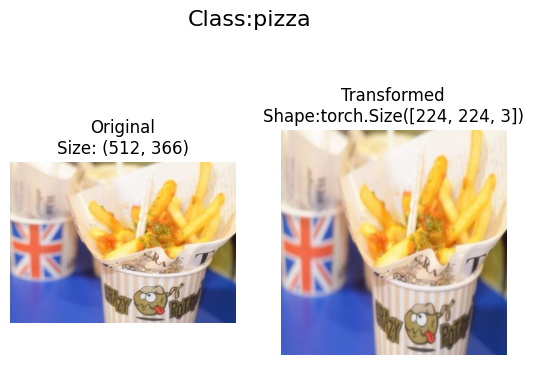

In [161]:
# Let's look at trivial augment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    seed=None
)

## 7. Model0: TinyVGG without data augmentation
Let's Replicate TinyVGG architecture from the CNN Explainer website

### 7.1 Creating tansforms and loading data for Model 0

In [164]:
#Create simple transform 
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

#1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                        transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                      transform=simple_transform)

#2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

#Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

#Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False)    

### 7.2 Create VGG tiny architecture


In [230]:
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units: int,
                 output_shape:int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2,
                        )
        )
            
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2,
                        )
        )
            
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                     out_features=output_shape,
                     )
        )
        
    def forward(self, x):
            x= self.conv_block_1(x)
            x= self.conv_block_2(x)
            x= self.classifier(x)
            return x
        

In [204]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)



In [205]:
image_batch, label_batch = next(iter(train_dataloader_simple))

model_0.eval()
with torch.inference_mode():
    y_pred =model_0(image_batch.to(device))
y_pred

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])


tensor([[ 2.0673e-02, -1.8577e-03,  1.0150e-02],
        [ 1.9347e-02,  3.1597e-03,  7.4475e-03],
        [ 1.8337e-02,  1.9958e-03,  8.1829e-03],
        [ 2.1068e-02, -2.6110e-03,  1.0277e-02],
        [ 2.1972e-02,  1.8999e-04,  1.0116e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 1.9515e-02, -1.1100e-03,  1.2304e-02],
        [ 1.8869e-02, -2.3141e-03,  9.5120e-03],
        [ 2.5152e-02, -4.1530e-03,  1.2133e-02],
        [ 2.0238e-02, -4.7979e-04,  1.0907e-02],
        [ 1.9972e-02, -2.9622e-03,  8.2557e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.2784e-02, -2.9035e-03,  9.9879e-03],
        [ 1.9760e-02, -2.7160e-04,  9.8395e-03],
        [ 2.1635e-02, -4.3995e-03,  9.4989e-03],
        [ 2.2589e-02, -3.4084e-03,  1.0640e-02],
        [ 2.0182e-02, -2.1775e-03,  9.5757e-03],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 2.1306e-02, -9.6527e-04,  1.0207e-02],
        [ 1.9073e-02, -9.2553e-05,  9.4177e-03],
        [ 1.7433e-02

In [210]:
from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

Training code <a name='trainingcode' />

In [228]:
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device=device):
    
    #Put the model in train mode
    model.train()
    model = model.to(device)
    train_loss, train_acc = 0,0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        #Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
    
    #Adjust metrics to get avg loss and accuracy per batch
    train_loss = train_loss /len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
        
        
    

In [214]:
def test_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn : torch.nn.Module,
             device=device):
    model.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            X,y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            #Calculate the accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += (test_pred_labels == y).sum().item()/len(test_pred_labels)
    #Adjust metrics to get avg loss and accuracy per batch
    test_loss = test_loss /len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc
    

In [232]:
from tqdm.auto import tqdm

#1. Create a train function that takes in various model parameters + optimizer + dataloaders+ loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int=5,
          device=device
         ):
    results = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device
                                       )
        print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:4f}\n')
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)
    return results

### 7.7 Train and evaluation model 0

In [264]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 20
model_0 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data.classes)).to(device)
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

from timeit import default_timer as timer
start_time = timer()

model_0_result = train(model=model_0,
                      train_dataloader=train_dataloader_simple,
                      test_dataloader=test_dataloader_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS,
                      device=device)
end_time = timer()
print(f'Total training time: {end_time-start_time:.3f} seconds')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train acc: 0.3125 | Test loss: 1.0980 | Test acc: 0.299242

Epoch: 1 | Train loss: 1.0982 | Train acc: 0.2852 | Test loss: 1.0846 | Test acc: 0.422348

Epoch: 2 | Train loss: 1.0994 | Train acc: 0.3359 | Test loss: 1.0902 | Test acc: 0.484848

Epoch: 3 | Train loss: 1.0875 | Train acc: 0.3828 | Test loss: 1.0748 | Test acc: 0.421402

Epoch: 4 | Train loss: 1.0406 | Train acc: 0.5352 | Test loss: 1.0661 | Test acc: 0.372159

Epoch: 5 | Train loss: 0.9886 | Train acc: 0.5742 | Test loss: 1.0896 | Test acc: 0.412879

Epoch: 6 | Train loss: 0.9918 | Train acc: 0.4414 | Test loss: 1.0178 | Test acc: 0.350379

Epoch: 7 | Train loss: 0.9404 | Train acc: 0.5039 | Test loss: 1.0138 | Test acc: 0.401515

Epoch: 8 | Train loss: 0.8169 | Train acc: 0.6172 | Test loss: 1.0287 | Test acc: 0.392045

Epoch: 9 | Train loss: 0.8894 | Train acc: 0.5312 | Test loss: 0.9676 | Test acc: 0.432765

Epoch: 10 | Train loss: 0.8481 | Train acc: 0.5820 | Test loss: 1.0607 | Test ac

In [265]:
model_0_result

{'train_loss': [1.106339454650879,
  1.0981702208518982,
  1.0994372963905334,
  1.0875488817691803,
  1.0406226590275764,
  0.9885795935988426,
  0.9917956069111824,
  0.9403608068823814,
  0.8168698474764824,
  0.8893656507134438,
  0.8480548188090324,
  0.842456141486764,
  0.8338869474828243,
  0.8141003176569939,
  0.8240032941102982,
  0.8101449683308601,
  0.9028770923614502,
  0.8170562088489532,
  0.7502387128770351,
  0.7625383734703064],
 'train_acc': [0.3125,
  0.28515625,
  0.3359375,
  0.3828125,
  0.53515625,
  0.57421875,
  0.44140625,
  0.50390625,
  0.6171875,
  0.53125,
  0.58203125,
  0.62890625,
  0.61328125,
  0.640625,
  0.68359375,
  0.65625,
  0.5546875,
  0.66015625,
  0.6953125,
  0.67578125],
 'test_loss': [1.0979762474695842,
  1.0845927000045776,
  1.0902208884557087,
  1.0747698148091633,
  1.066091537475586,
  1.0895631114641826,
  1.017810066541036,
  1.0137777129809062,
  1.0287105043729146,
  0.9676278034845988,
  1.060702125231425,
  1.01707629362742

In [266]:
def plot_loss_curves(results: Dict[str, List[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']
    
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    
    #Figure out how many epochs there were
    epochs = range(len(results['train_loss']))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.xlabel('Epoch')
    plt.legend()

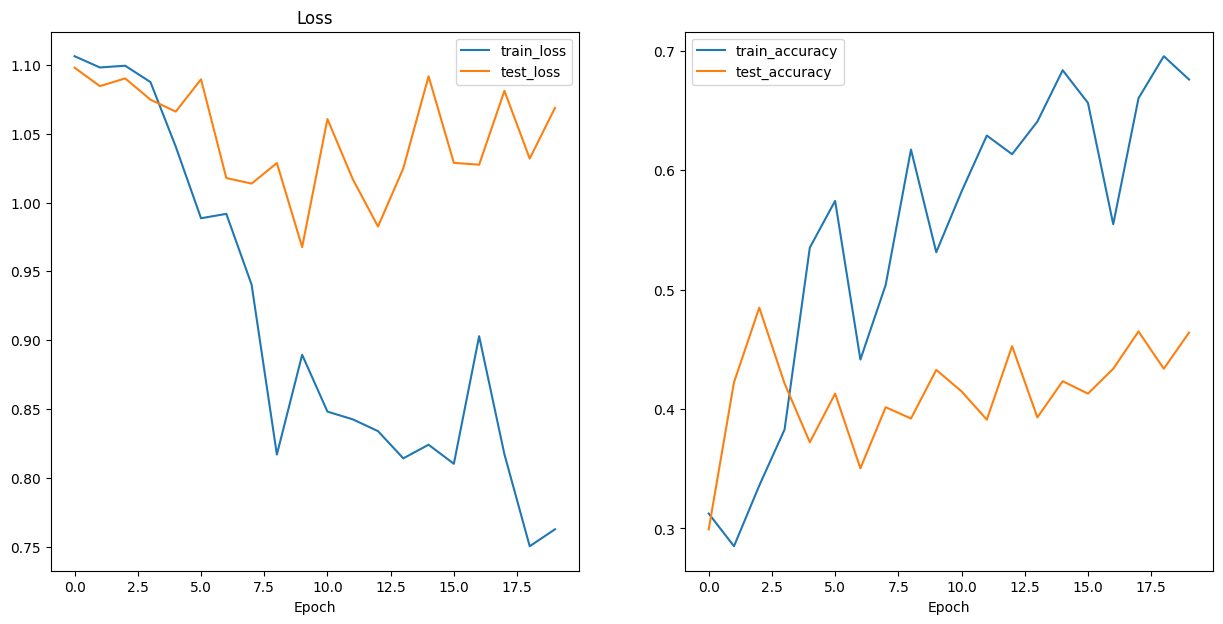

In [267]:
plot_loss_curves(model_0_result)

Now let's try another modelling experiment this time using the same model as before with some data augmentation.

### 9.1 Create transform with data augmentation

In [250]:
#Create training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
])

### 9.2 Create train and test `Dataset`'s and `DataLoader`'s with data augmentation

In [251]:
#Turn image folders into datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transform_simple)

In [269]:
#Turn our Datasets into DataLoaders
import os
BATCH_SIZE=32

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader_simple = DataLoader(test_data_simple,batch_size=BATCH_SIZE,shuffle=True)


### 9.3 Construct and train model 1
This time we'll be using the same model architecture except this time we've augmented the training data


In [270]:
#Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Wonderful! Now we've a model and dataloaders, let's create a loss function and an optimizer and call upon our train() function to evaluate our model

In [275]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 20
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_result = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device
                       )

end_time = timer()
print(f'Total training time for model_1:{end_time-start_time:.3f} seconds')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.9157 | Train acc: 0.6719 | Test loss: 1.0049 | Test acc: 0.432765

Epoch: 1 | Train loss: 0.9526 | Train acc: 0.5664 | Test loss: 1.0410 | Test acc: 0.411932

Epoch: 2 | Train loss: 0.9767 | Train acc: 0.4805 | Test loss: 0.9883 | Test acc: 0.421402

Epoch: 3 | Train loss: 0.9471 | Train acc: 0.6211 | Test loss: 1.0054 | Test acc: 0.392992

Epoch: 4 | Train loss: 1.0031 | Train acc: 0.4648 | Test loss: 0.9478 | Test acc: 0.452652

Epoch: 5 | Train loss: 0.8587 | Train acc: 0.6172 | Test loss: 1.0226 | Test acc: 0.422348

Epoch: 6 | Train loss: 0.9120 | Train acc: 0.6016 | Test loss: 0.9815 | Test acc: 0.430871

Epoch: 7 | Train loss: 0.9414 | Train acc: 0.6328 | Test loss: 0.9776 | Test acc: 0.442235

Epoch: 8 | Train loss: 0.9307 | Train acc: 0.5391 | Test loss: 1.0408 | Test acc: 0.372159

Epoch: 9 | Train loss: 0.9135 | Train acc: 0.5977 | Test loss: 1.0155 | Test acc: 0.464962

Epoch: 10 | Train loss: 0.9359 | Train acc: 0.5586 | Test loss: 1.0029 | Test ac

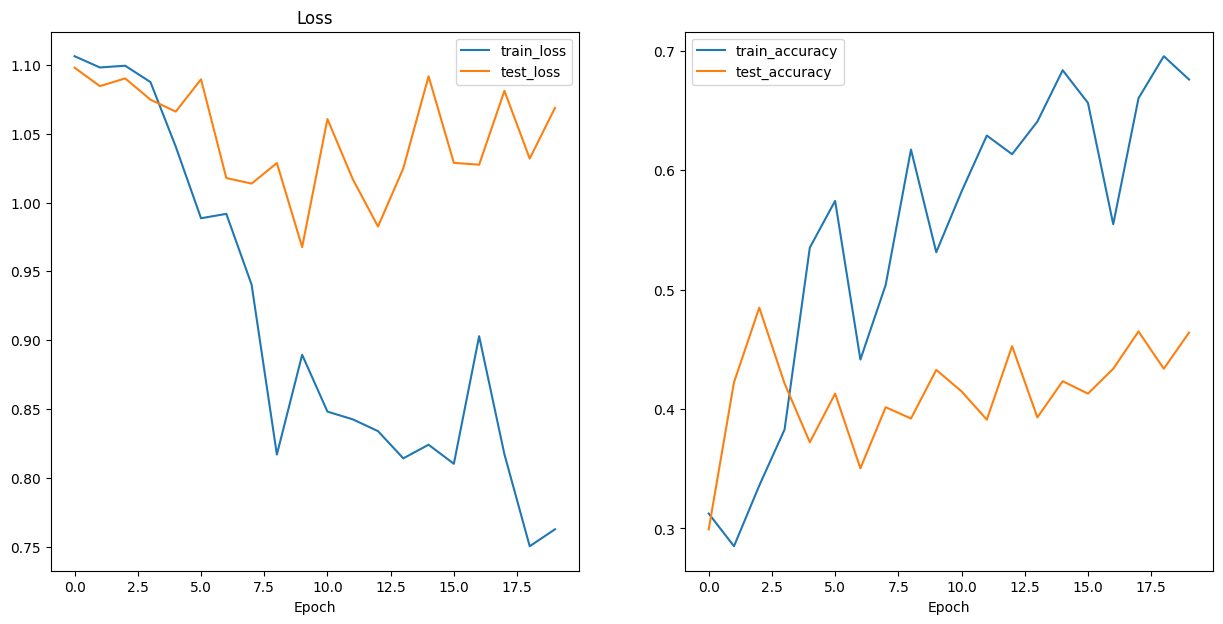

In [273]:
plot_loss_curves(model_0_result)

##10. Compare model results
After evaluating our modelling experiments on their own, it's important to compare them ach other.

Few different ways to do this:
    1. Hard coding
    2. PyTorch + TensorBoard
    3. Weight & Biases
    4. MLFlow

In [276]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_result)
model_1_df = pd.DataFrame(model_1_result)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106339,0.312500,1.097976,0.299242
1,1.098170,0.285156,1.084593,0.422348
2,1.099437,0.335938,1.090221,0.484848
3,1.087549,0.382812,1.074770,0.421402
4,1.040623,0.535156,1.066092,0.372159
5,0.988580,0.574219,1.089563,0.412879
6,0.991796,0.441406,1.017810,0.350379
7,0.940361,0.503906,1.013778,0.401515
8,0.816870,0.617188,1.028711,0.392045
9,0.889366,0.531250,0.967628,0.432765


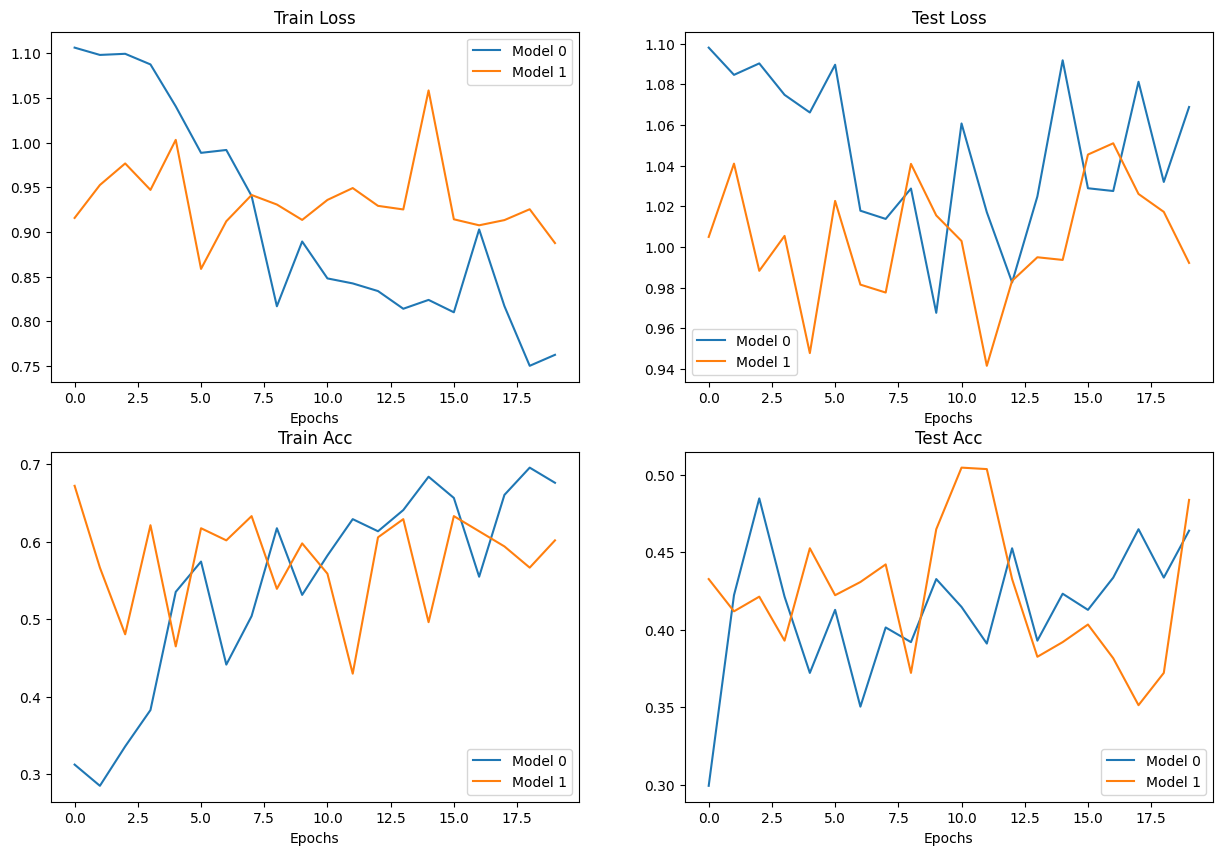

In [279]:
#Setup a plot
plt.figure(figsize=(15,10))

#Get number of epochs
epochs = range(len(model_0_df))

#Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label='Model 0')
plt.plot(epochs, model_1_df['train_loss'], label='Model 1')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label='Model 0')
plt.plot(epochs, model_1_df['test_loss'], label='Model 1')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label='Model 0')
plt.plot(epochs, model_1_df['train_acc'], label='Model 1')
plt.title('Train Acc')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label='Model 0')
plt.plot(epochs, model_1_df['test_acc'], label='Model 1')
plt.title('Test Acc')
plt.xlabel('Epochs')
plt.legend()

### 11. Making a prediction on a custom image

In [280]:
import requests

custom_image_path = data_path / '04-pizza-dad.jpeg'

if not custom_image_path.is_file():
    with open(custom_image_path, 'wb') as f:
        request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg')
        print(f'Downloading {custom_image_path}...')
        f.write(request.content)
else:
    print(f'{custom_image_path} already exist, skipping download...')

### 11.1 Loading in a custom image with PyTorch

We have to make sure our custom image is in the same format as the data our model was trained on.
* In tensor form with datatype
* Of shape 64,64,3
* On the right device

In [285]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8


tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

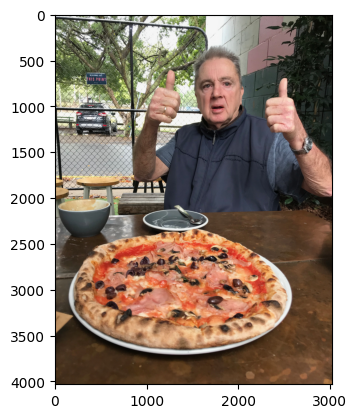

In [284]:
plt.imshow(custom_image_uint8.permute(1,2,0))

### 11.2 Making a prediction on a custom image with a trained PyTorch model

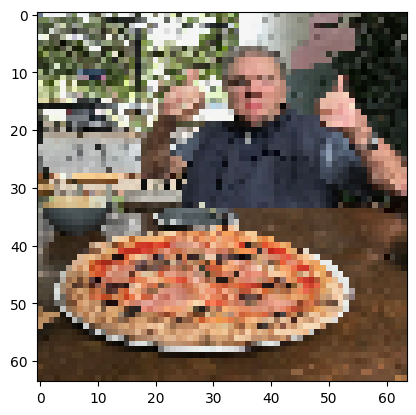

In [300]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.

custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

custom_image_transformed = custom_image_transform(custom_image)
plt.imshow(custom_image_transformed.permute(1,2,0))


In [297]:
model_0.eval()
with torch.inference_mode():
    custom_image_pred = model_0(custom_image_transformed.unsqueeze(dim=0).to(device))
    
class_names[custom_image_pred.argmax(dim=1)]

'pizza'

In [301]:
def prediction(model: torch.nn.Module,
               image_path: str,
              class_names: List[str],
              transform=None,
              device=device):
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32) / 255.
    
    if transform:
        target_image = transform(target_image)
    model.to(device)
    
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(0)
        target_image_pred = model(target_image.to(device))
        
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
        title = f'Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}'
    else:
        title = f'Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}'
    plt.title(title)
    plt.axis(False)
        
    
  
    

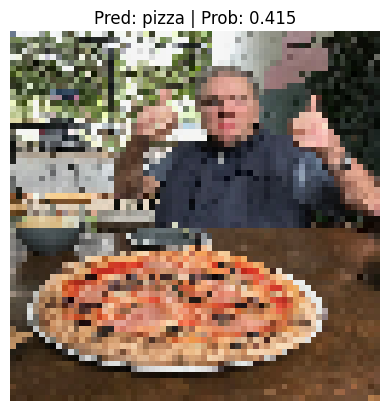

In [304]:
prediction(model=model_0,
           image_path=custom_image_path,
          class_names=class_names,
          transform=custom_image_transform,
          device=device)